In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
#getting the data
df = pd.read_csv('arrhythmia.data',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [57]:
#selecting the columns of interest
# 7 is T interval: Average duration of T wave in msec., linear
# 8 is P interval: Average duration of P wave in msec., linear
heart = df[[7, 8]]

In [58]:
heart.head()


,7,8
0,174,121
1,149,39
2,185,102
3,179,143
4,177,103


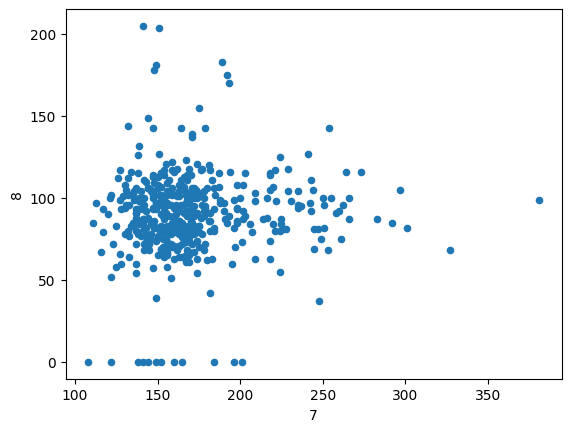

In [105]:
#making the scatter plot
plot = heart.plot.scatter(7, 8)

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [50]:
scaler = StandardScaler()

In [70]:
#normalizing the data
heart_T = scaler.fit_transform(heart[[7,8]])
heart_T = pd.DataFrame(heart_T, columns = ['T_int', 'P_int'])
heart_T.head()

,T_int,P_int
0,0.113809,1.201469
1,-0.588564,-1.977064
2,0.422853,0.464980
3,0.254284,2.054247
4,0.198094,0.503742


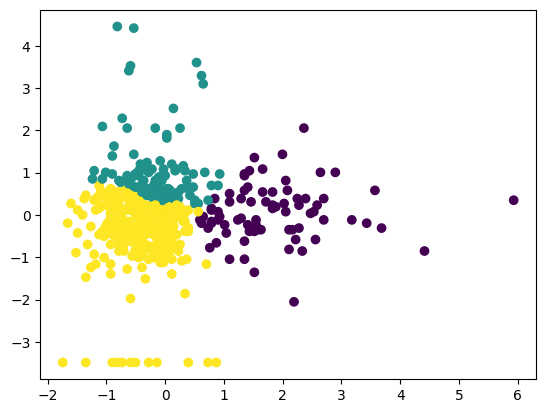

In [123]:
#demonstarting K-means clutering on some data from the arrhythmia dataset. I chose three groups
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
cluster = km.fit_predict(heart_T)

SSE = silhouette_score(heart_T, cluster, metric='euclidean')
heart_T['cluster1'] = cluster
plt.scatter(x = heart_T['T_int'], y = heart_T['P_int'], c = heart_T['cluster1'])


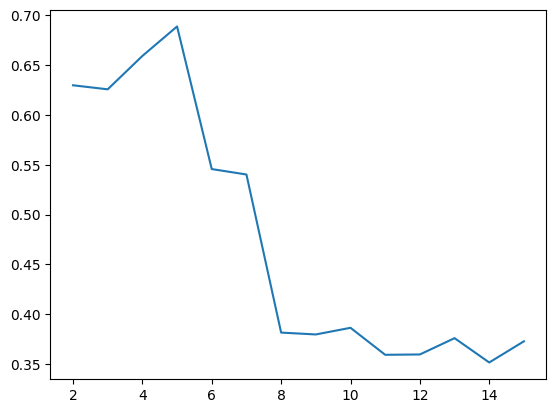

In [103]:
#creating a function that will return the SSE for each k value, and then create an elbow plot
def bestk (krange, data):          #function takes arguments for the maximum value of k, and the data
    kvalues = []
    SSEvalues = []
    for k in range(2, krange+1):      #there has to be at least 2 groups, or else it throws an error
        km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 300, tol = 1e-4, random_state = 0)
        result = km.fit_predict(data)
        SSE = silhouette_score(data, result, metric='euclidean')
        kvalues.append(k)
        SSEvalues.append(SSE)
    plt.plot(kvalues, SSEvalues)

bestk (15, heart_T) #I chose 15 as my maximum k value
#The elbow plot shows that a k value of 8 is the optimal value, as that is where the biggest infection point is

    

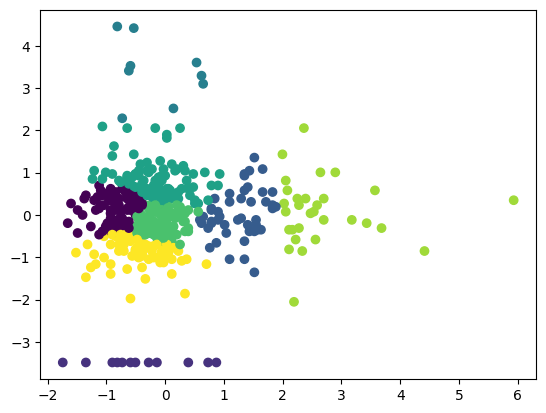

In [124]:
#creating the plot with 8 groups
km = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
cluster = km.fit_predict(heart_T)

SSE = silhouette_score(heart_T, cluster, metric='euclidean')
heart_T['cluster1'] = cluster
k8fig = plt.scatter(x = heart_T['T_int'], y = heart_T['P_int'], c = heart_T['cluster1'])

The above plot shows onw of the ways this scatterplot could be clutered into 8 seperate groups. This is probably not the best method for grouping this data. Visually there is clearly one large group that this has split up into 4 seperate clusters.